# Подготовка данных для ASR

## Импорты

In [1]:
import re

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from torch.utils.data import Dataset

from dataset_all import IPS1ASRDataset
from utils import clean_text

## Датасеты

In [2]:
DATASET_PATH = '../tatar_asr_2'

In [3]:
ips_dataset_train = IPS1ASRDataset(f'{DATASET_PATH}/train/')
ips_dataset_valid = IPS1ASRDataset(f'{DATASET_PATH}/valid/')

In [4]:
print(f'len(ips_dataset_train) = {len(ips_dataset_train)}')
print(f'len(ips_dataset_valid) = {len(ips_dataset_valid)}')

len(ips_dataset_train) = 100236
len(ips_dataset_valid) = 10447


In [5]:
ips_dataset_train.data[65]

{'text': '4580_1164979260.txt', 'audio': '4580_1164979260.wav'}

In [6]:
def from_dataset_to_df(dataset: Dataset) -> pd.DataFrame:
    data = []
    for index in range(len(dataset)):
        item = dataset.get_metadata(index)
        
        text = clean_text(item[2])
        item_dict = {
            'id': str(item[0].split('/')[-1][:-4]),
            'text': text,
            'len': len(text),
            'word_count': len(text.split())
        }
        data.append(item_dict)
    df = pd.DataFrame(data)
    del data
    return df

In [7]:
df_train = from_dataset_to_df(ips_dataset_train)
df_valid = from_dataset_to_df(ips_dataset_valid)

In [8]:
df_train.head()

,id,text,len,word_count
0,2439_268175952,халыкларыбыз якын булсын дус яшәсен дип күп сө...,52,8
1,3825_5399531075,ярар азат,9,2
2,3649_268175952,тагын объектта милицияне кичекмәстән чакырту т...,60,7
3,2588_394009940,атыңны миңа илтеп тугар да,26,5
4,387_734070593,методик планда укытучыга укучылар белән эшләгә...,116,13


In [9]:
df_valid.head()

,id,text,len,word_count
0,872_987311976,ни кызганыч узган гасырның еракта калган нчы е...,97,14
1,661_835724583,xix оккупантлар гаскәре украинаның уң як яр ти...,90,12
2,774_835724583,гражданнарга карата муниципаль җир контролен г...,120,13
3,611_464206256,кыз аны таныды һәм гаҗәпләнүле сөенеч аның йөз...,65,10
4,92_707000598,әгәр куып җибәрсәм укырга йөрүдән туктаячак,43,6


## Исследование данных

### Длина текста

#### value_counts

In [10]:
df_train['len'].value_counts()

len
50     2351
52     2167
53     2124
45     2050
49     2039
       ... 
120      70
6        67
119      48
5        25
3        19
Name: count, Length: 117, dtype: int64

In [11]:
df_train['word_count'].value_counts()

word_count
9     14128
8     13552
7     13461
6     12511
10    11404
5      9369
4      7646
3      4711
11     3500
2      2298
13     1939
12     1815
14     1337
15      950
16      624
17      503
1       223
18      120
19       73
20       72
Name: count, dtype: int64

#### Гистограммы

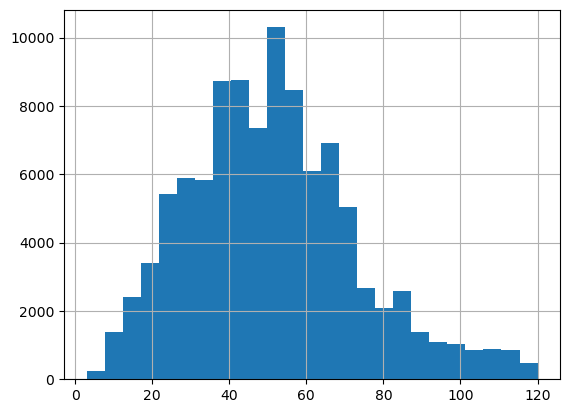

In [12]:
df_train['len'].hist(bins=25)
None

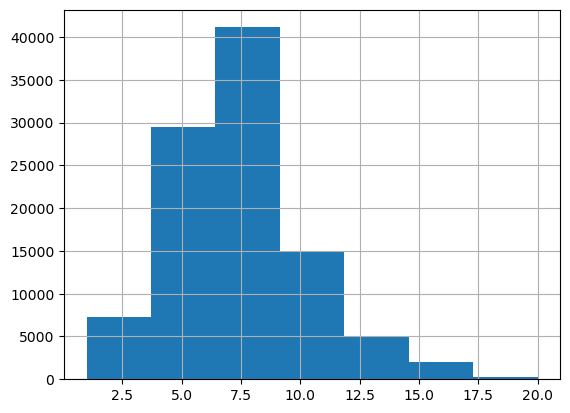

In [13]:
df_train['word_count'].hist(bins=7)
None

#### Ящик с усами

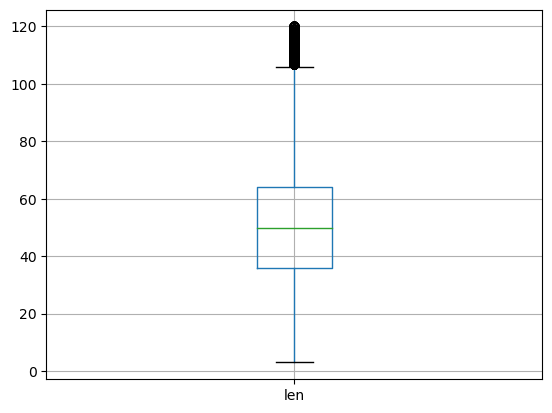

In [14]:
df_train.boxplot(column='len')
None

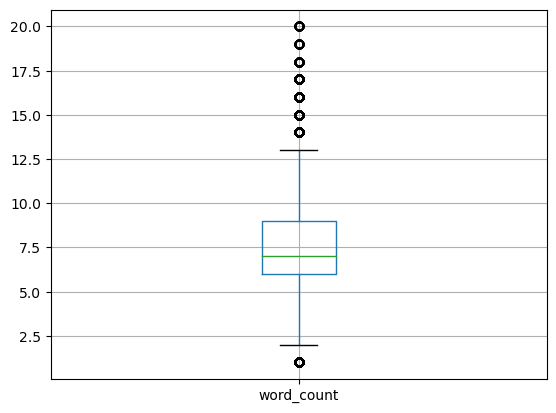

In [15]:
df_train.boxplot(column='word_count')
None

#### describe

In [16]:
df_train['word_count'].describe()

count    100236.000000
mean          7.554761
std           2.889775
min           1.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          20.000000
Name: word_count, dtype: float64

In [17]:
df_train['len'].describe()

count    100236.000000
mean         51.245900
std          21.894677
min           3.000000
25%          36.000000
50%          50.000000
75%          64.000000
max         120.000000
Name: len, dtype: float64

### Вывод

In [18]:
df_train.loc[df_train['word_count'] == 1].shape[0] / df_train.shape[0] * 100

0.22247495909653217

In [18]:
# df_train.loc[(2 < df_train['len']) & (df_train['len'] < 68)].shape[0] / df_train.shape[0] * 100

Удалим 10% данных, которые являются выбросами

In [18]:
#df_train = df_train.loc[df_train['word_count'] == 1]
# df_train = df_train.loc[(2 < df_train['len']) & (df_train['len'] < 68)]

#df_valid = df_valid.loc[df_valid['word_count'] == 1]
# df_valid = df_valid.loc[(2 < df_valid['len']) & (df_valid['len'] < 68)]

In [19]:
df_train.to_csv(f'{DATASET_PATH}/train.csv')
df_valid.to_csv(f'{DATASET_PATH}/valid.csv')

### Цифры

In [20]:
def get_digits(text):
    numbers = re.findall(r'\d+', text)
    return numbers == []

In [21]:
assert get_digits('бөгелеп төшмәве') == True, 'Неверная работа функции get_digits'
assert get_digits('бөгелеп төшмәве 1') == False, 'Неверная работа функции get_digits'
assert get_digits('1 бөгелеп төшмәве 2') == False, 'Неверная работа функции get_digits'

In [22]:
df_train['numbers'] = df_train['text'].apply(lambda row: get_digits(row))
df_valid['numbers'] = df_valid['text'].apply(lambda row: get_digits(row))

In [23]:
df_train.loc[df_train['numbers'] == False].head()

,id,text,len,word_count,numbers


In [24]:
df_valid.loc[df_valid['numbers'] == False].head()

,id,text,len,word_count,numbers


In [24]:
df_train.loc[df_train['numbers'] == False].shape[0]

0

Найдено 33 строки в тренировочном наборе данных, в которых встречаюся числительные

### Специальные символы

In [25]:
def get_char_dijits(text):
    special_characters = '@#$%^&*()-+_=<>/\'":;[]{}\\|~`!?,.'
    for char in text:
        if char in special_characters:
            return False
    return True

In [26]:
assert get_char_dijits('бөгелеп төшмәве') == True, 'Неверная работа функции get_digits'
assert get_char_dijits('бөгелеп төшмәве ""') == False, 'Неверная работа функции get_digits'
assert get_char_dijits('1 бөгелеп төшмәве ..\\||') == False, 'Неверная работа функции get_digits'

In [27]:
df_train['char_dijits'] = df_train['text'].apply(lambda row: get_char_dijits(row))
df_valid['char_dijits'] = df_valid['text'].apply(lambda row: get_char_dijits(row))

In [28]:
df_train.loc[df_train['char_dijits'] == False].head()

,id,text,len,word_count,numbers,char_dijits


In [29]:
df_train.loc[df_train['char_dijits'] == False].shape[0]

0

In [30]:
df_valid.loc[df_valid['char_dijits'] == False].head()

,id,text,len,word_count,numbers,char_dijits


In [31]:
df_valid.loc[df_train['char_dijits'] == False].shape[0]

0

Мы разрешаем иметь в данных !?, символы. остальные нужно будет удалить из датасета